# Fetal Health Classification
Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.





## Features

**'baseline value'** - FHR baseline (beats per minute)

**'accelerations'** - Number of accelerations per second

**'fetal_movement'** - Number of fetal movements per second

**'uterine_contractions'** - Number of uterine contractions per second

**'light_decelerations'** - Number of light decelerations per second

**'severe_decelerations'** - Number of severe decelerations per second

**'prolongued_decelerations'** - Number of prolonged decelerations per second

**'abnormal_short_term_variability'** - Percentage of time with abnormal short term variability

**'mean_value_of_short_term_variability'** - Mean value of short term variability

**'percentage_of_time_with_abnormal_long_term_variability'** - Percentage of time with abnormal long term variability

**'mean_value_of_long_term_variability'** - Mean value of long term variability

**'histogram_width'** - Width of FHR histogram

**'histogram_min'** - Minimum (low frequency) of FHR histogram

**'histogram_max'** - Maximum (high frequency) of FHR histogram

**'histogram_number_of_peaks'** - Number of histogram peaks

**'histogram_number_of_zeroes'** Number of histogram zeros

**'histogram_mode'** - Histogram mode

**'histogram_mean'** - Histogram mean

**'histogram_median'** - Histogram median

**'histogram_variance**' - Histogram variance

**'histogram_tendency'** - Histogram tendency

## Target


**'fetal_health'** - 1 (Normal), 2 (Suspect), 3 (Pathological)


# Import libraries

In [113]:
from google.colab import drive 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
# # Avoids scroll-in-the-scroll in the entire Notebook
# from IPython.display import Javascript
# def resize_colab_cell():
#   display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
# get_ipython().events.register('pre_run_cell', resize_colab_cell)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load data


In [115]:
fetal_health_df = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')
fetal_health_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Remove duplicates from our data set
 

In [116]:
fetal_health_df = fetal_health_df[~fetal_health_df.duplicated()==1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Analys and visualisation
Here I want to get some information about this data set.

## Data set Info

In [117]:
fetal_health_df.info()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

After removing duplicates the data set have 2123 examples and each example has 21 features and none of them are null.

## Count Values
For each feature count each instance.  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

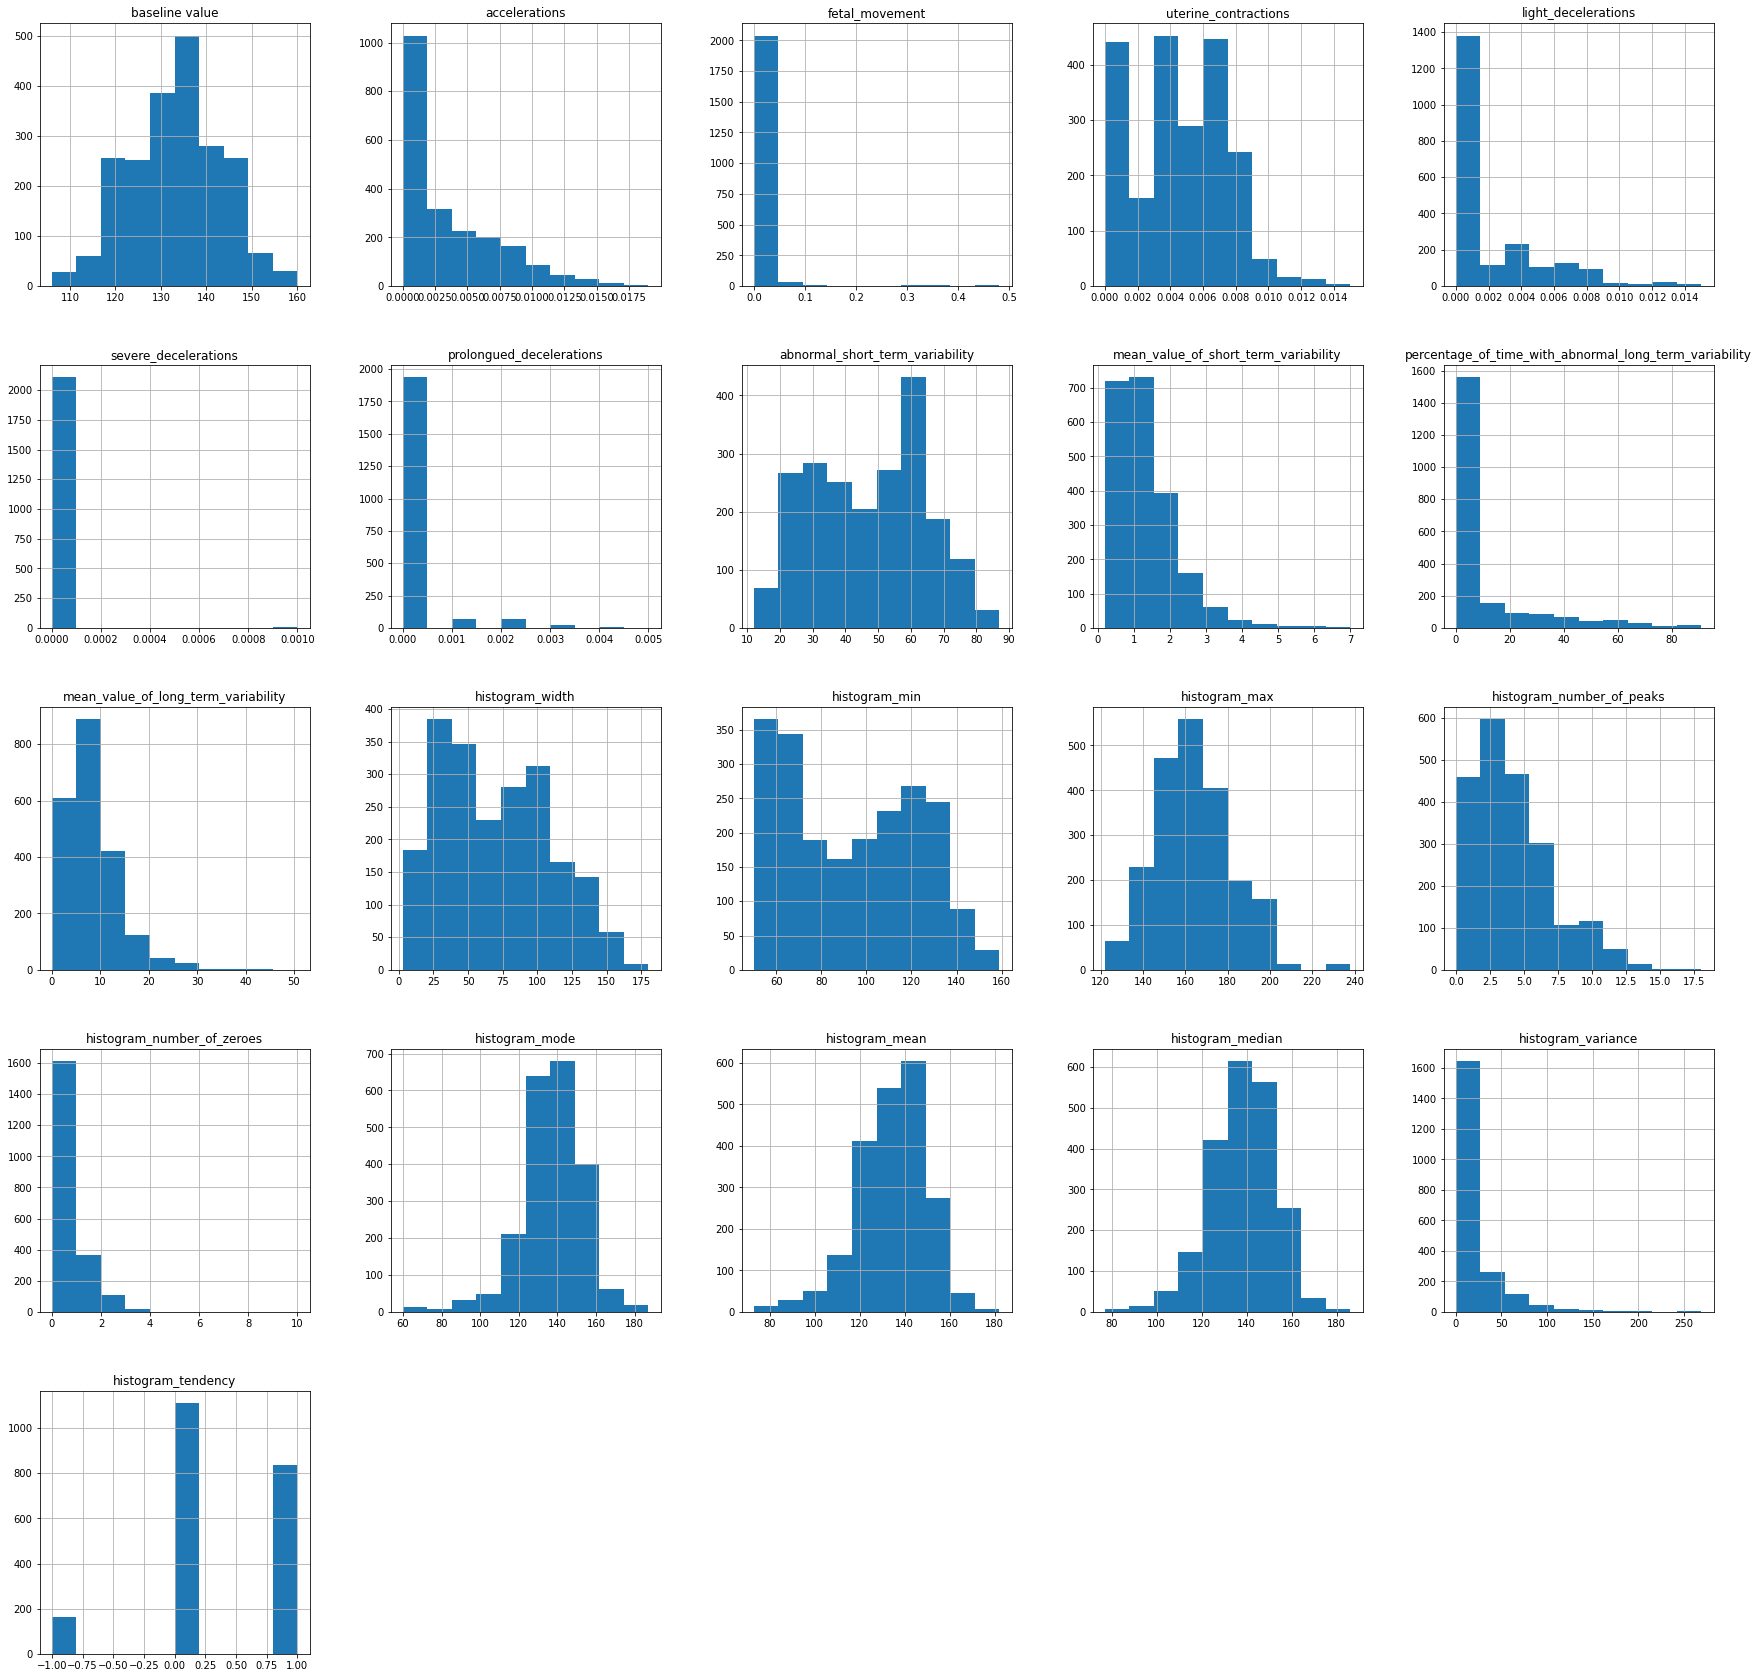

In [118]:
fetal_health_df.hist(figsize = (30,30),column = fetal_health_df.drop('fetal_health', axis=1).columns ); # without the label column

In most the featured the values are nicely scattered except fetal_movement, light_decelerations, severe_decelerations, prolongued_decelerations, percentage_of_time_with_abnormal_long_term_variability, histogram_number_of_zeroes and histogram_varience.  


## Count labels 
For each label counts how many instance there are.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

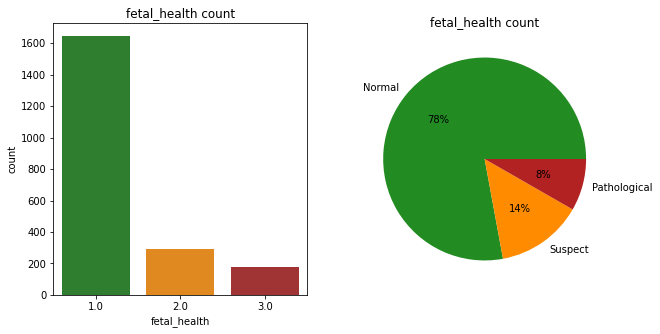

In [119]:
plt.figure(figsize = (10,5))
plt.subplot(121)

colors_dict={1.0 : "forestgreen",2.0: "darkorange", 3.0:"firebrick"}
ax = sns.countplot(data = fetal_health_df, x = "fetal_health", palette = colors_dict)
ax.set( title='fetal_health count')

plt.subplot(122)
labels =  ["Normal", "Suspect","Pathological"]
label_sum = [len(fetal_health_df[fetal_health_df.fetal_health == 1.0]), len(fetal_health_df[fetal_health_df.fetal_health == 2.0]),len(fetal_health_df[fetal_health_df.fetal_health == 3.0])]
plt.pie(label_sum, labels=labels, colors = list(colors_dict.values()), autopct="%1.0f%%")
plt.title('fetal_health count')

plt.show()

We can see that the labels are heavely imbalance.

## Heatmap
Plots heatmap 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

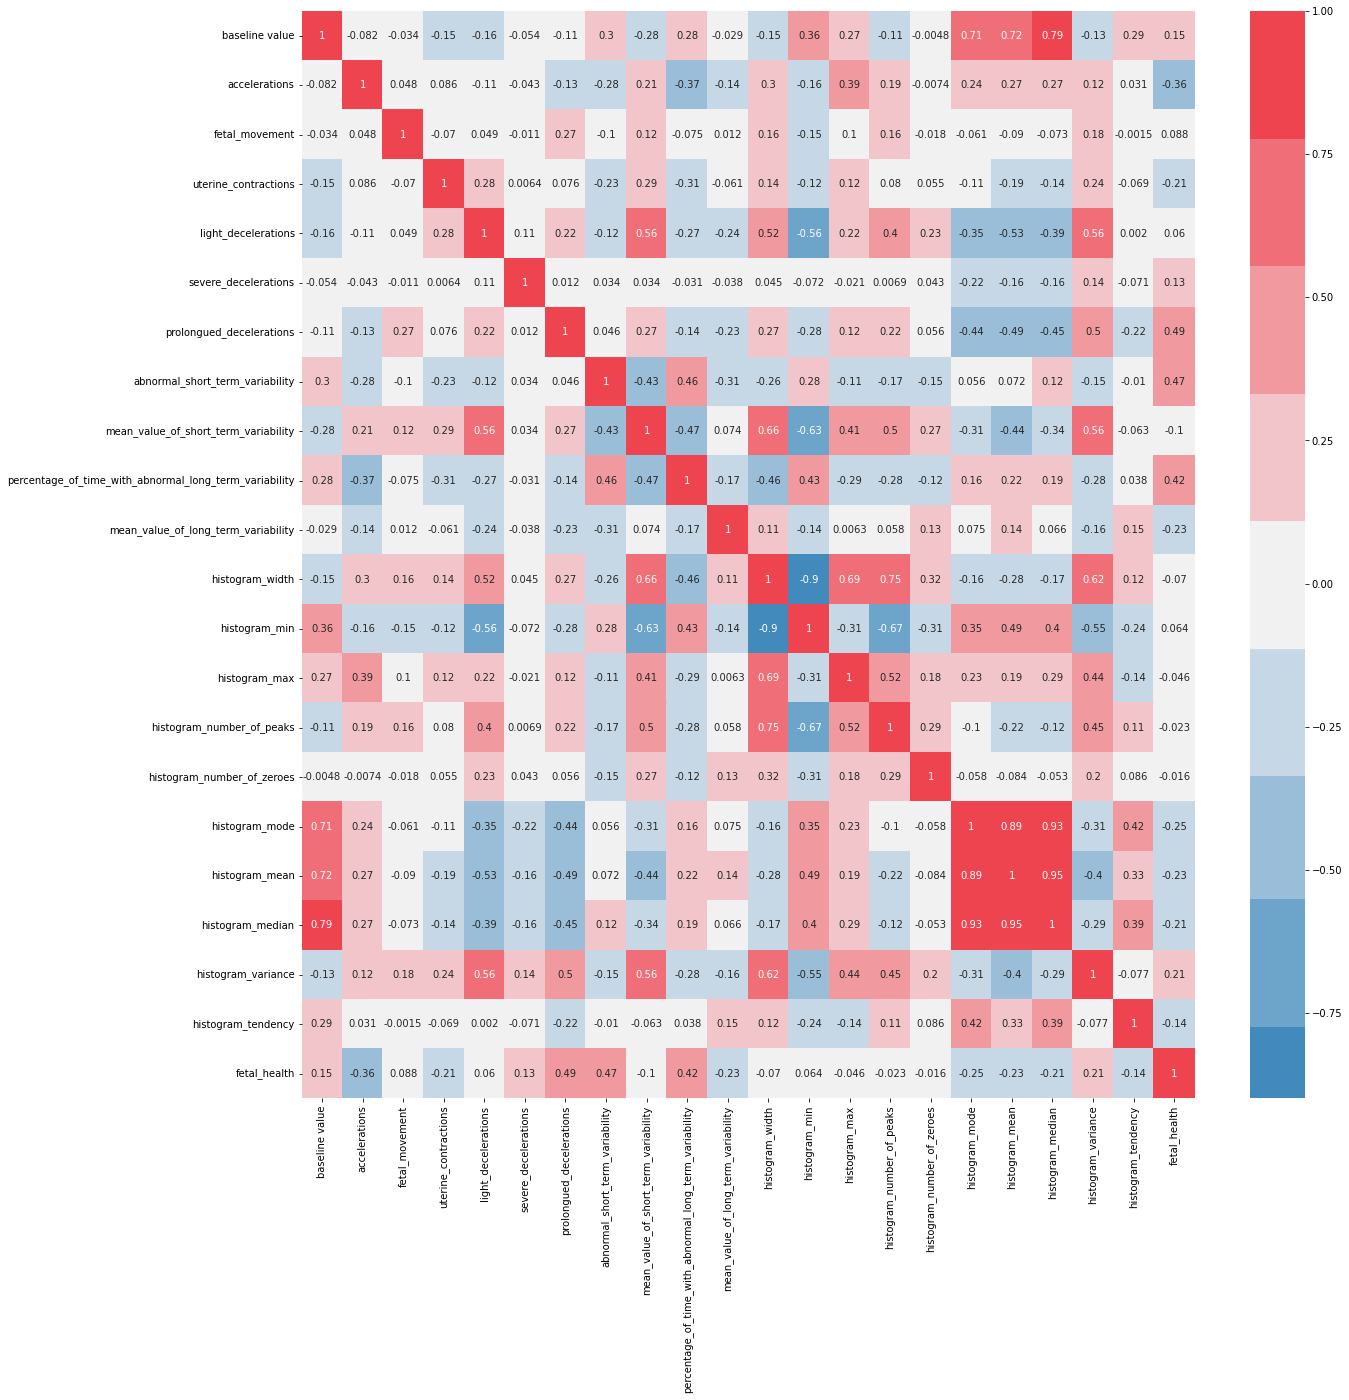

In [120]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(240,10, s=80, l=55, n=9)
sns.heatmap(fetal_health_df.corr(),annot=True,cmap = cmap, center=0)
plt.show()

In our classification task we are interested with the correlation between 'fetal_health' and the rest of the features. We can assume the following:
*  Features like 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability' and 'histogram_mode' are higly correlated with 'fetal_health’.

*  Features like 'fetal_movement', 'light_decelerations', 'mean_value_of_short_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes' don't show much correlation with 'fetal_health'. Those features can be dropped.


## Visualisation Heatmap features

In [121]:
def plt_label_feature_correlation(feature, labels, data):
  sns.regplot(x=feature, y=labels, data=data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### accelerations
Number of accelerations per second

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

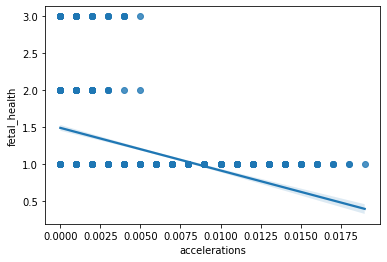

In [122]:
plt_label_feature_correlation('accelerations','fetal_health',fetal_health_df)

### prolongued_decelerations
Number of prolonged decelerations (PDs) per second

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

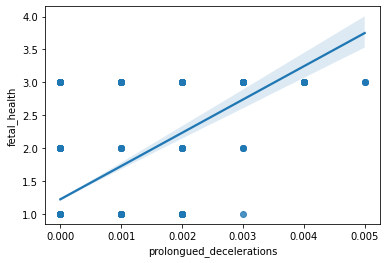

In [123]:
plt_label_feature_correlation('prolongued_decelerations','fetal_health',fetal_health_df)

### abnormal_short_term_variability
Percentage of time with abnormal short term variability


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

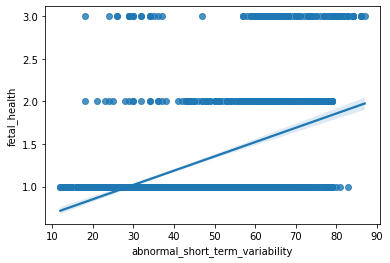

In [124]:
plt_label_feature_correlation( 'abnormal_short_term_variability','fetal_health',fetal_health_df)

### mean_value_of_short_term_variability

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

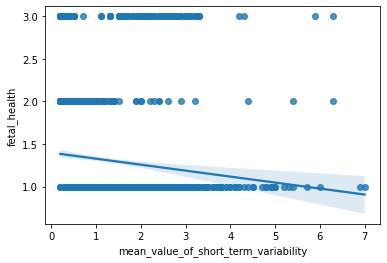

In [125]:
plt_label_feature_correlation('mean_value_of_short_term_variability','fetal_health',fetal_health_df)

### percentage_of_time_with_abnormal_long_term_variability

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

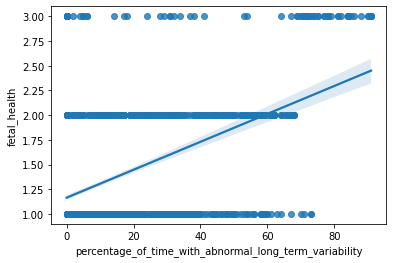

In [126]:
plt_label_feature_correlation('percentage_of_time_with_abnormal_long_term_variability', 'fetal_health',fetal_health_df)

### histogram_mode

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

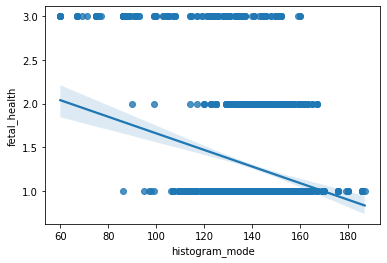

In [127]:
plt_label_feature_correlation('histogram_mode', 'fetal_health',fetal_health_df)

## Plot relasionships
Following the heatmap - plot pairwaise relasionships in the data set with high corrolation to our label

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

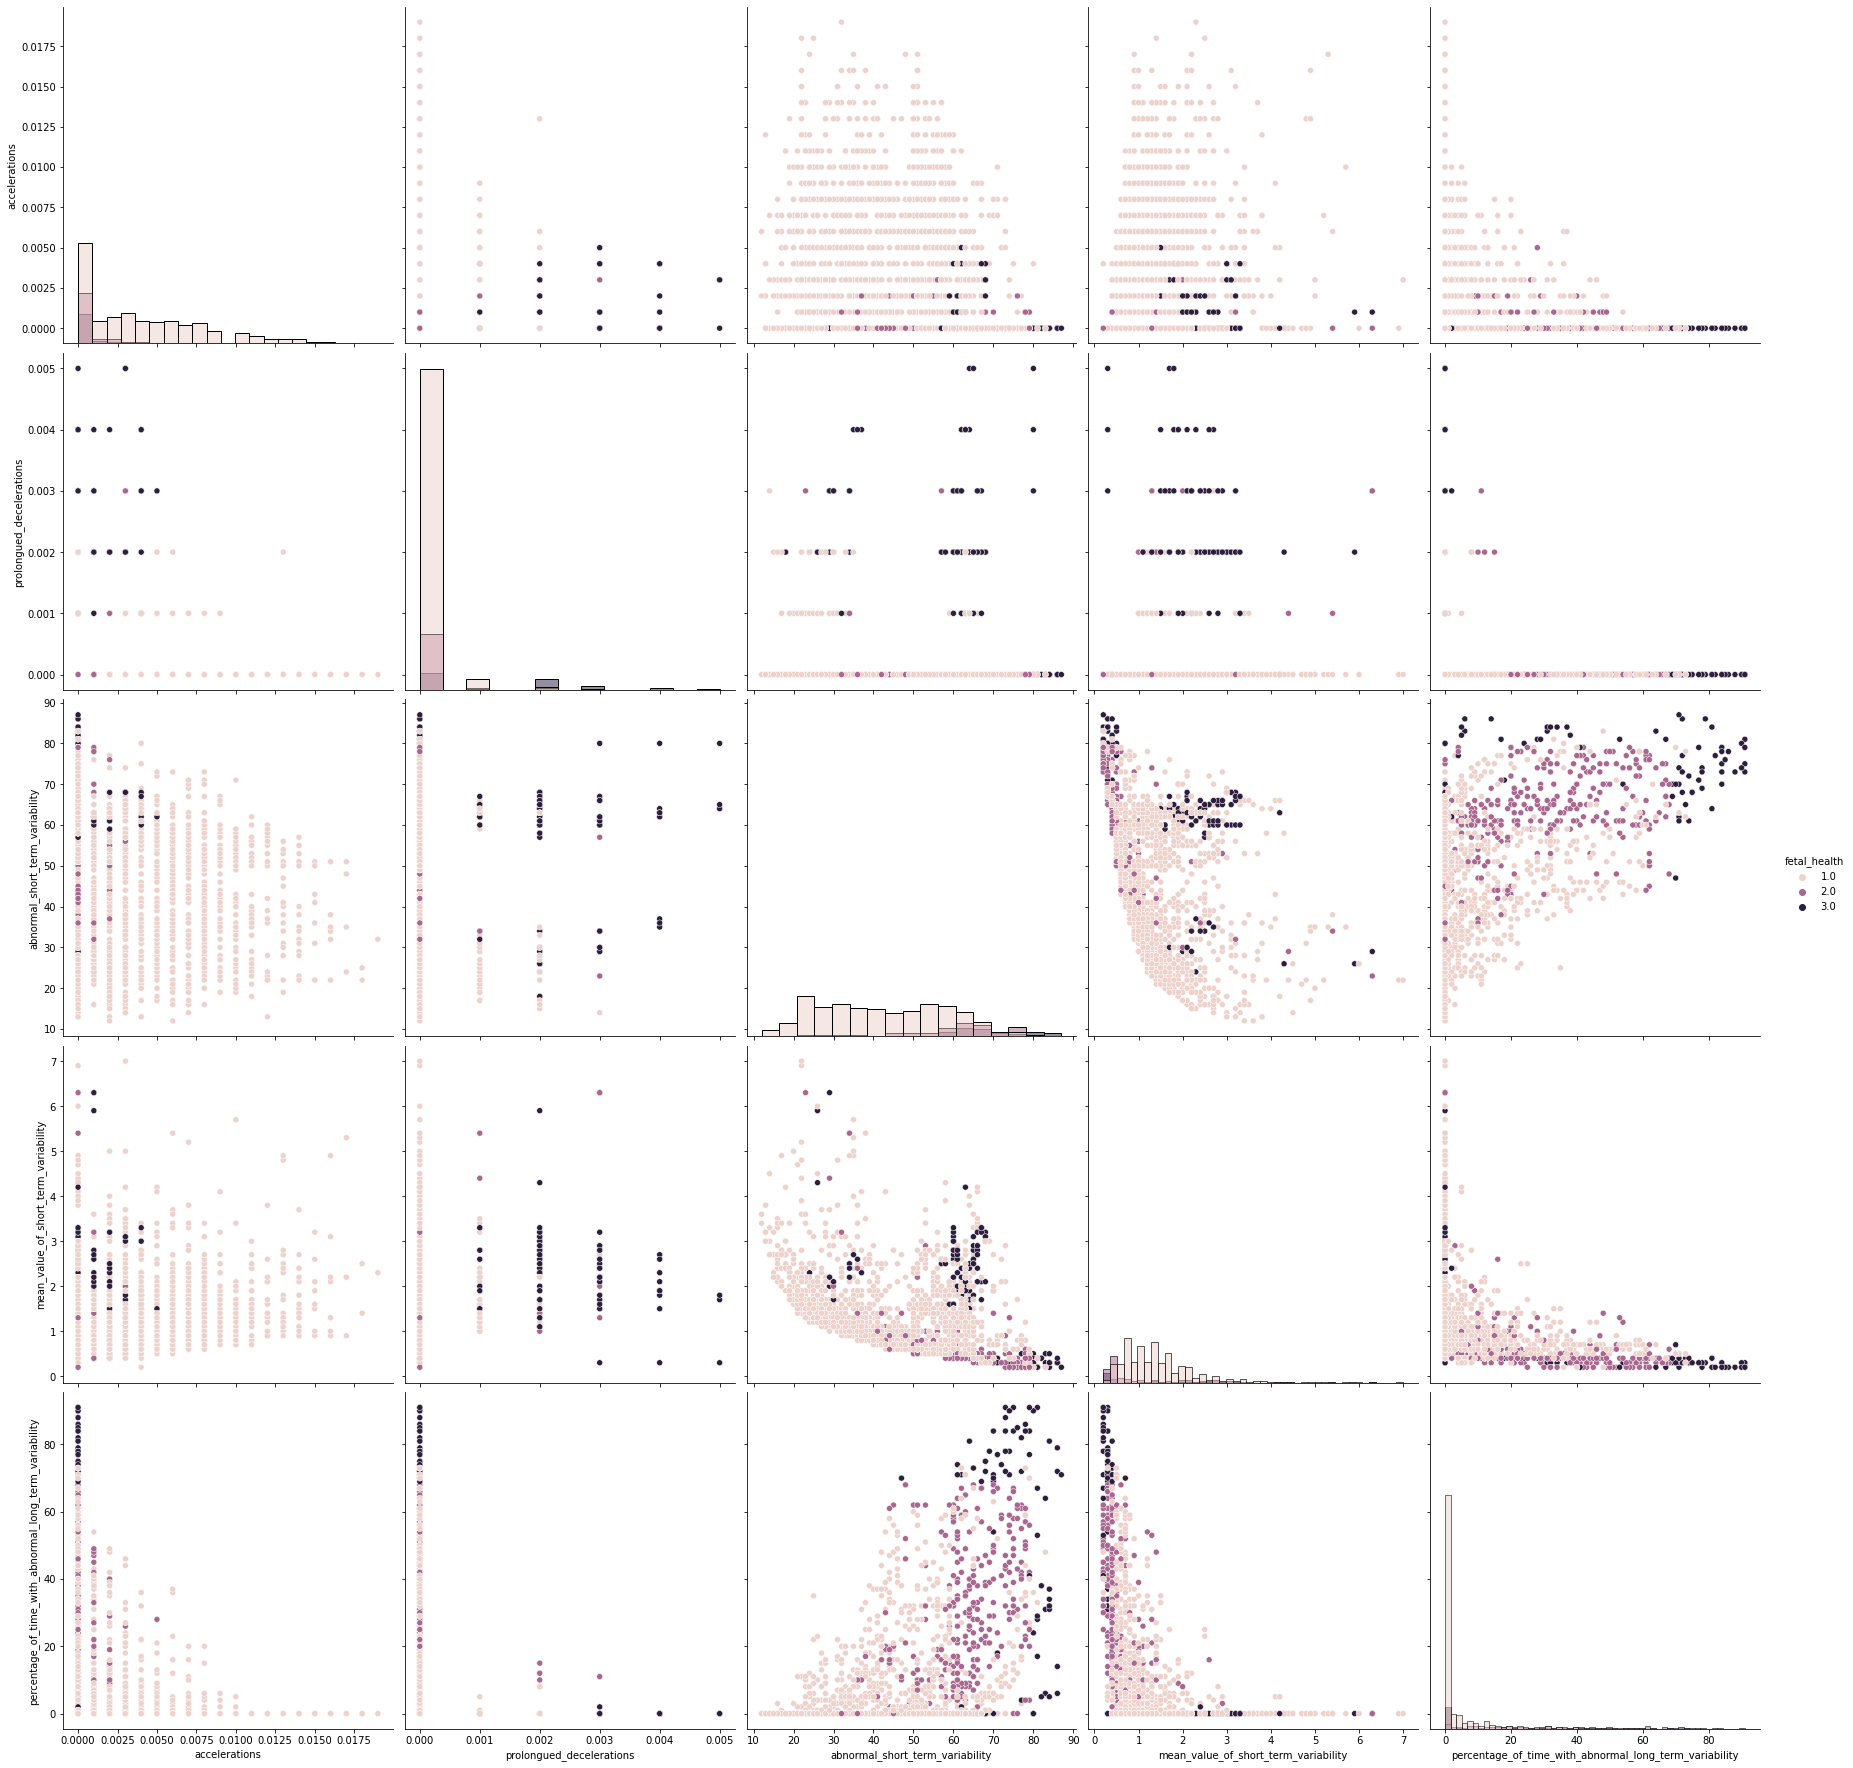

In [128]:
sns.pairplot(fetal_health_df,
             hue="fetal_health",
             vars=[ 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 
                   'mean_value_of_short_term_variability',  'percentage_of_time_with_abnormal_long_term_variability']
             , diag_kind="hist"
             , height=5);

# Modeling
*  Nearest Neighbors Classifier
*  Logistic Regression
*  Adaboost Classifier
*  SVM
*  Decision Tree
*  RandomForestClassifier
*  XGBoost

## Data Split
Splliting the data into train and test

In [129]:
y_labels = fetal_health_df['fetal_health']
x_fetures = fetal_health_df.drop('fetal_health',axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x_fetures, y_labels, test_size=0.33, random_state=42)

x_train_drop = x_train.drop(['fetal_movement', 'light_decelerations','mean_value_of_short_term_variability',
                                              'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes'],axis = 1)
x_test_drop = x_test.drop(['fetal_movement', 'light_decelerations','mean_value_of_short_term_variability',
                                              'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes'],axis = 1)
print(f'x_train {x_train.shape}, x_test {x_test.shape}, y_train {y_train.shape}, y_test {y_test.shape}, x_train_drop {x_train_drop.shape}, x_test_drop {x_test_drop.shape}')
# xd_train, xd_test, yd_train, yd_test = train_test_split(x_fetures_droped, y_labels, test_size=0.33, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

x_train (1415, 21), x_test (698, 21), y_train (1415,), y_test (698,), x_train_drop (1415, 13), x_test_drop (698, 13)


## Running model
Simple function that helps train the model

### Run - OLD

In [131]:
# def train_test_model(model, train_features, train_labels, test_features, test_labels):

#   # training the model on the training data
#   model.fit(train_features, train_labels)

#   # make predictions for test data
#   pred = model.predict(test_features)

#   # calculate accuracy
#   acc = accuracy_score(test_labels,pred)
#   print(f'The model achieved accuracy of {acc*100}%!')

#   # plot confusion matrix
#   cm = confusion_matrix(test_labels, pred, labels=model.classes_)
#   disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=model.classes_)
#   disp.plot(cmap='inferno')

   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Run

In [132]:
def train_test_models(model_original, model_dropped):
  f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

  # original data
  # training the model on the training data
  model_original.fit(x_train, y_train)

  # make predictions for test data
  pred1 = model_original.predict(x_test)

  # calculate accuracy
  acc1 = accuracy_score(y_test,pred1)
  print(f'The model with the original ds achieved accuracy of {acc1*100}%!')

  # plot confusion matrix
  cm1 = confusion_matrix(y_test, pred1, labels=model_original.classes_)
  disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                               display_labels=model_original.classes_)
  disp1.plot(ax=axes[0], xticks_rotation=45)
  disp1.ax_.set_title('Original Data Set')
  disp1.im_.colorbar.remove()
  disp1.ax_.set_xlabel('')

  # dropped data
  # training the model on the training data
  model_dropped.fit(x_train_drop, y_train)

  # make predictions for test data
  pred2 = model_dropped.predict(x_test_drop)

  # calculate accuracy
  acc2 = accuracy_score(y_test,pred2)
  print(f'The model with the dropped ds achieved accuracy of {acc2*100}%!')

  # plot confusion matrix
  cm2 = confusion_matrix(y_test, pred2, labels=model_dropped.classes_)
  disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=model_dropped.classes_)
  disp2.plot(ax=axes[1], xticks_rotation=45)
  disp2.ax_.set_title('Dropped Data Set')
  disp2.im_.colorbar.remove()
  disp2.ax_.set_xlabel('')


  plt.subplots_adjust(wspace=0.40, hspace=0.1)
  
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Training models with the data as is

### KNN
Training on K=3,5,7 each on Lp=1,2,inf

#### K-3 N Neighbor

##### L1 Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 92.40687679083095%!
The model with the dropped ds achieved accuracy of 92.26361031518626%!


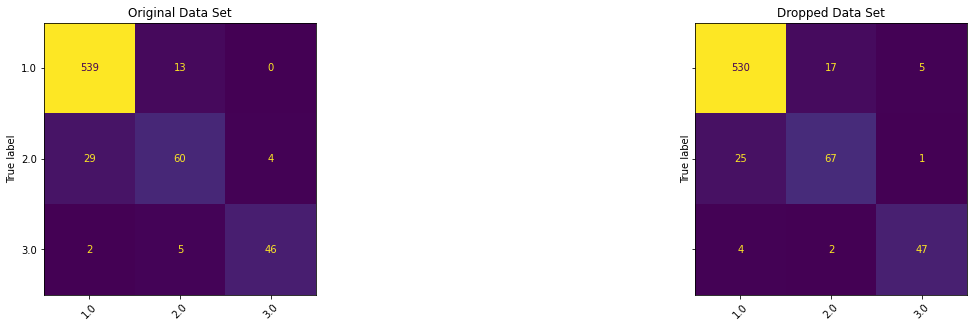

In [133]:
k3nn_l1_1 = KNeighborsClassifier(n_neighbors=3, p=1)
k3nn_l1_2 = KNeighborsClassifier(n_neighbors=3, p=1)
train_test_models(k3nn_l1_1, k3nn_l1_2);

##### L2 Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 90.68767908309455%!
The model with the dropped ds achieved accuracy of 91.97707736389685%!


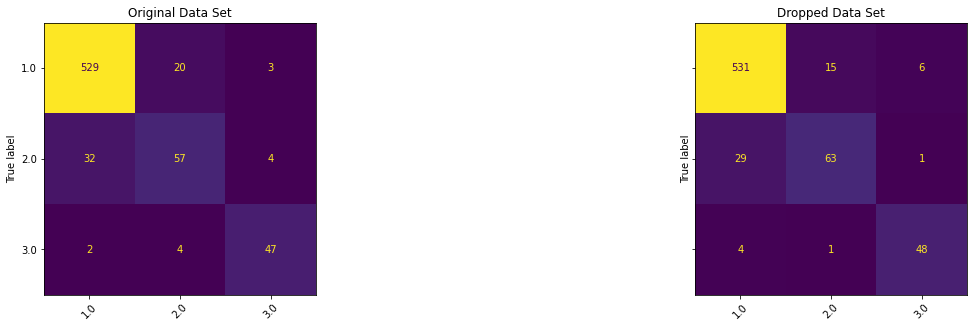

In [134]:
k3nn_l2_1 = KNeighborsClassifier(n_neighbors=3, p=2)
k3nn_l2_2 = KNeighborsClassifier(n_neighbors=3, p=2)
train_test_models(k3nn_l2_1, k3nn_l2_2);

##### Linf Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 88.96848137535817%!
The model with the dropped ds achieved accuracy of 92.12034383954155%!


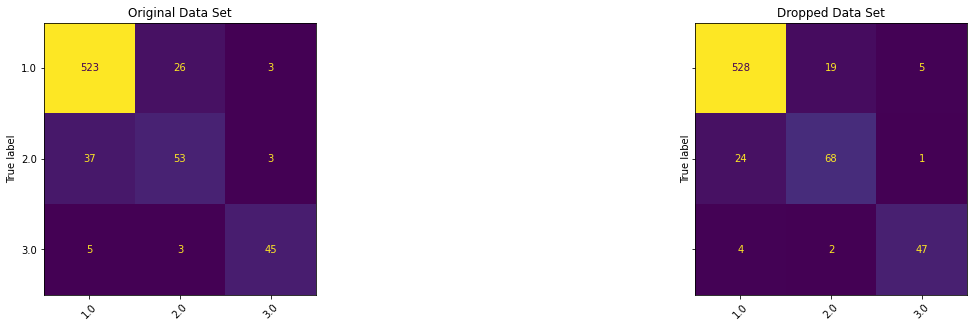

In [135]:
k3nn_linf_1 = KNeighborsClassifier(n_neighbors=3, p=float('inf'))
k3nn_linf_2 = KNeighborsClassifier(n_neighbors=3, p=float('inf'))
train_test_models(k3nn_linf_1, k3nn_linf_2);

##### K3NN Analysis

#### K-5 N Neighbor

##### L1 Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 90.54441260744986%!
The model with the dropped ds achieved accuracy of 92.26361031518626%!


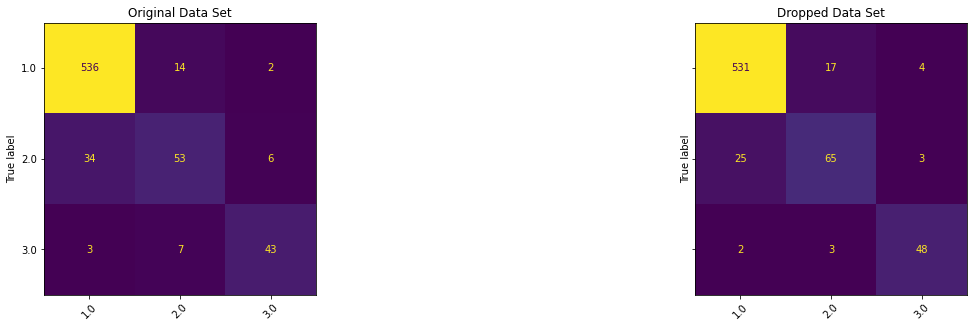

In [136]:
k5nn_l1_1 = KNeighborsClassifier(n_neighbors=5, p=1)
k5nn_l1_2 = KNeighborsClassifier(n_neighbors=5, p=1)
train_test_models(k5nn_l1_1, k5nn_l1_2);

##### L2 Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 90.54441260744986%!
The model with the dropped ds achieved accuracy of 91.69054441260745%!


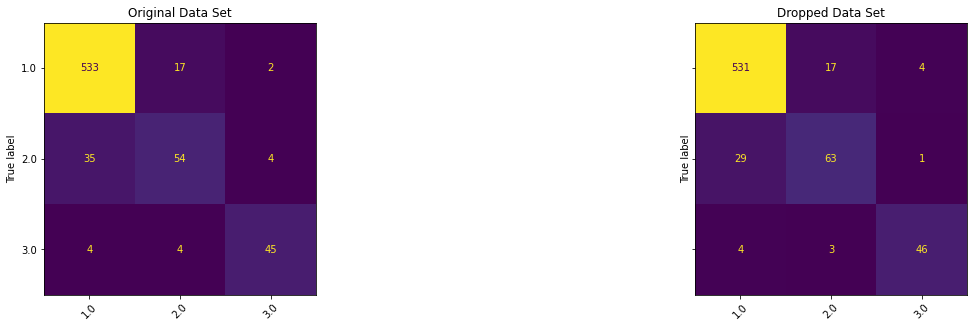

In [137]:
k5nn_l2_1 = KNeighborsClassifier(n_neighbors=5, p=2)
k5nn_l2_2 = KNeighborsClassifier(n_neighbors=5, p=2)
train_test_models(k5nn_l2_1, k5nn_l2_2);

##### Linf Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 88.96848137535817%!
The model with the dropped ds achieved accuracy of 91.40401146131805%!


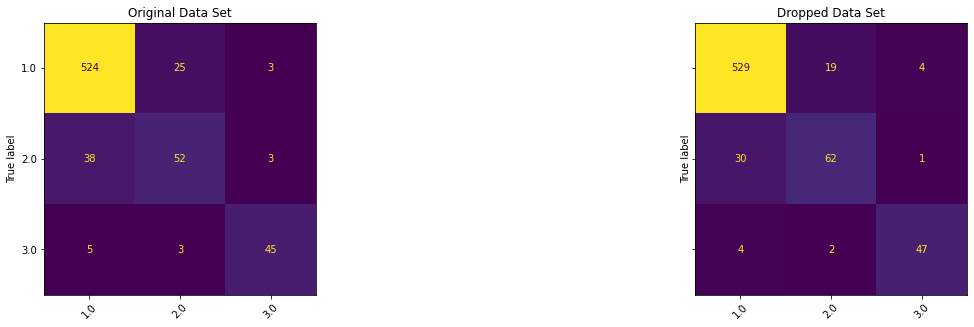

In [138]:
k5nn_linf_1 = KNeighborsClassifier(n_neighbors=5, p=float('inf'))
k5nn_linf_2 = KNeighborsClassifier(n_neighbors=5, p=float('inf'))
train_test_models(k5nn_linf_1, k5nn_linf_2);

##### K5NN Analysis

#### K-7 N Neighbor

##### L1 Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 90.83094555873924%!
The model with the dropped ds achieved accuracy of 91.83381088825216%!


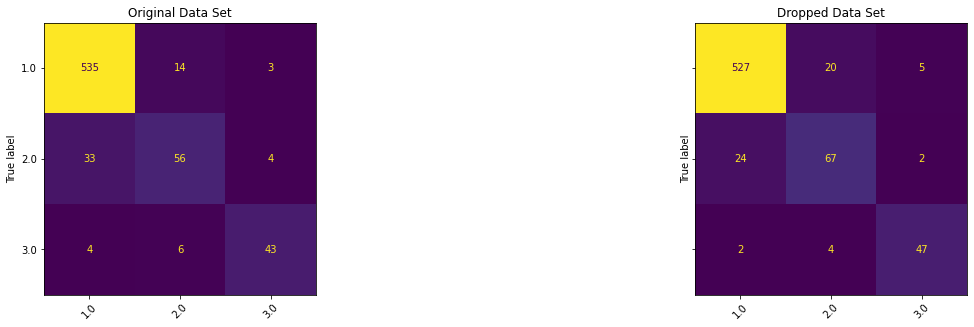

In [139]:

k7nn_l1_1 = KNeighborsClassifier(n_neighbors=7, p=1)
k7nn_l1_2 = KNeighborsClassifier(n_neighbors=7, p=1)
train_test_models(k7nn_l1_1, k7nn_l1_2);

##### L2 Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 90.54441260744986%!
The model with the dropped ds achieved accuracy of 91.54727793696274%!


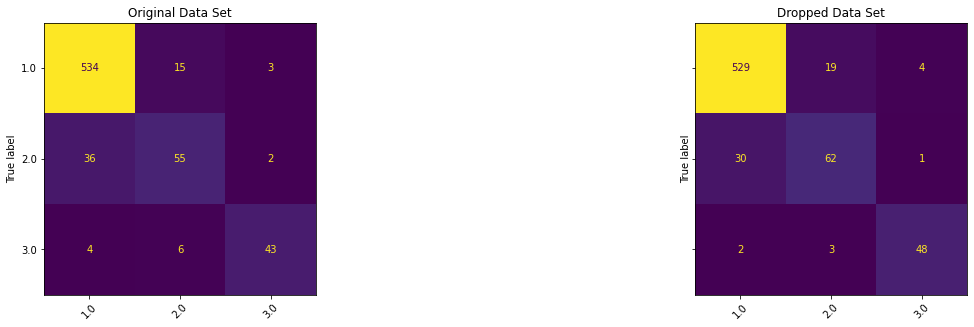

In [140]:
k7nn_l2_1 = KNeighborsClassifier(n_neighbors=7, p=2)
k7nn_l2_2 = KNeighborsClassifier(n_neighbors=7, p=2)
train_test_models(k7nn_l2_1, k7nn_l2_2);

##### Linf Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 88.25214899713467%!
The model with the dropped ds achieved accuracy of 90.68767908309455%!


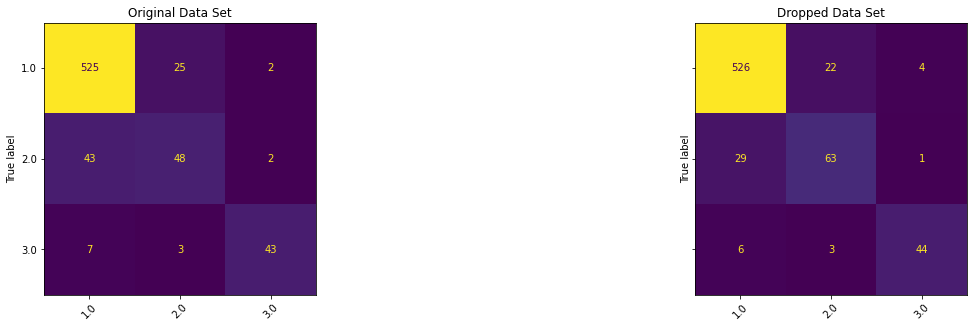

In [141]:
k7nn_linf_1 = KNeighborsClassifier(n_neighbors=7, p=float('inf'))
k7nn_linf_2 = KNeighborsClassifier(n_neighbors=7, p=float('inf'))
train_test_models(k7nn_linf_1, k7nn_linf_2);

##### K7NN Analysis


#### Overall Analysis for KNN


### Logistic Regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 88.96848137535817%!
The model with the dropped ds achieved accuracy of 88.10888252148997%!


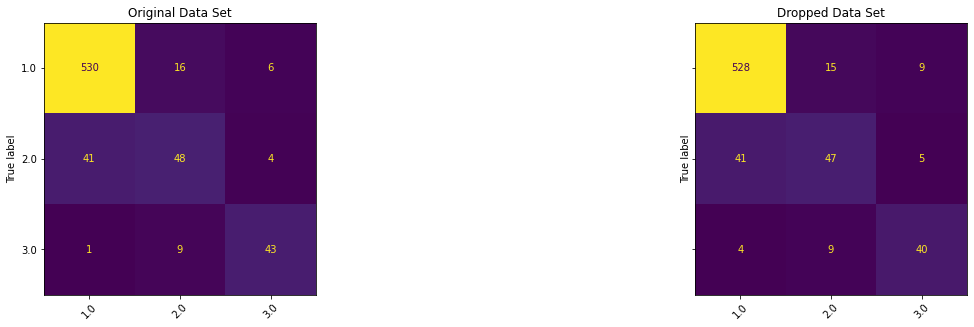

In [142]:
logistic_regression_1 = LogisticRegression(multi_class='multinomial' , solver='newton-cg', max_iter=250)
logistic_regression_2 = LogisticRegression(multi_class='multinomial' , solver='newton-cg', max_iter=250)
train_test_models(logistic_regression_1, logistic_regression_2 )

#### Logistic Regresion Analysis

### Adaboost

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 91.11747851002865%!
The model with the dropped ds achieved accuracy of 90.40114613180515%!


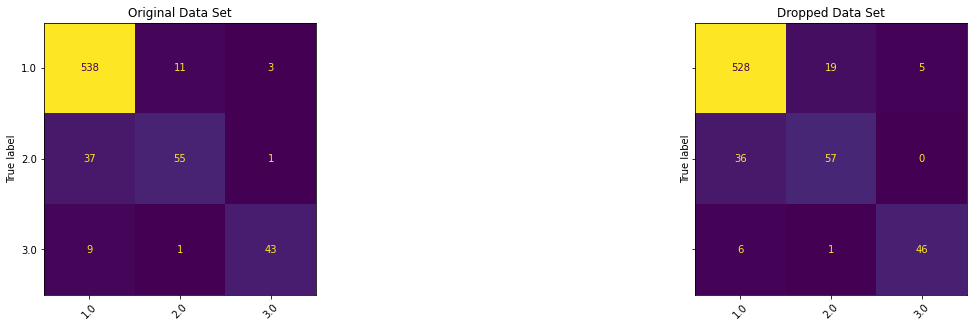

The model with the original ds achieved accuracy of 90.68767908309455%!
The model with the dropped ds achieved accuracy of 90.83094555873924%!


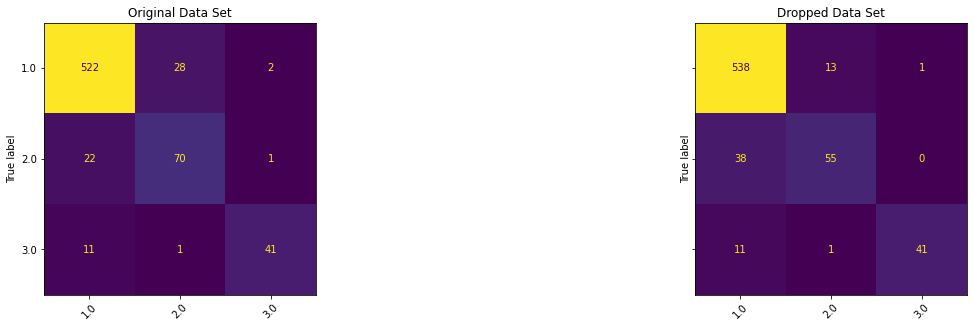

The model with the original ds achieved accuracy of 91.26074498567334%!
The model with the dropped ds achieved accuracy of 91.83381088825216%!


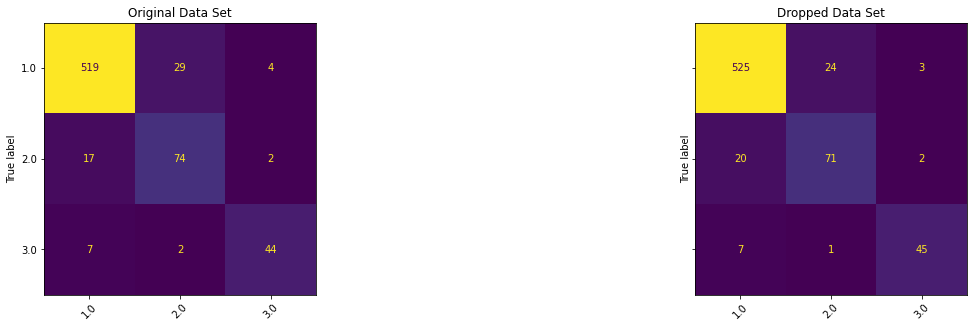

The model with the original ds achieved accuracy of 91.11747851002865%!
The model with the dropped ds achieved accuracy of 91.26074498567334%!


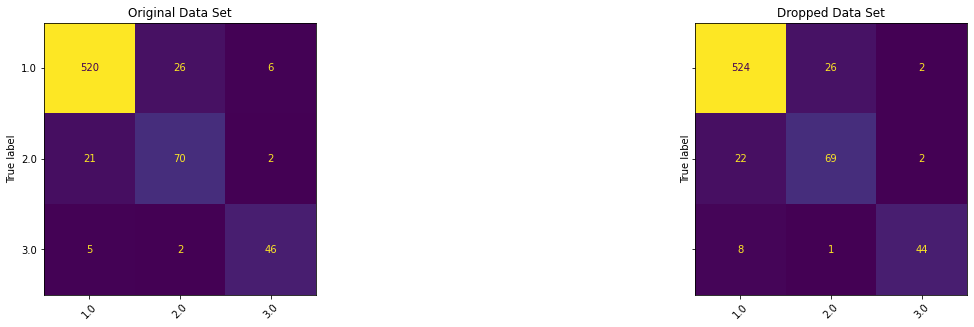

The model with the original ds achieved accuracy of 90.68767908309455%!
The model with the dropped ds achieved accuracy of 90.83094555873924%!


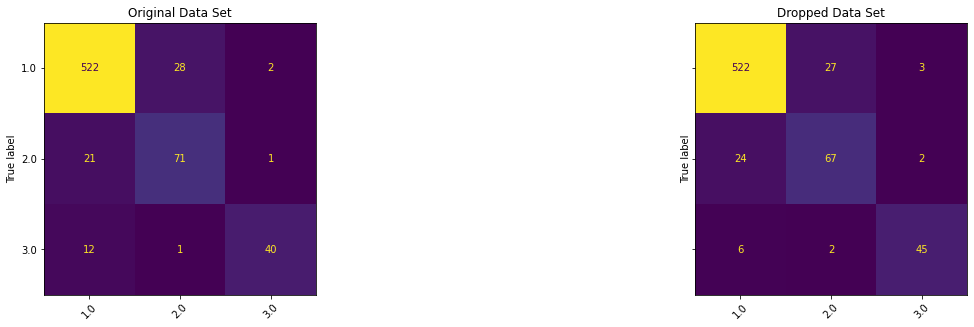

The model with the original ds achieved accuracy of 82.52148997134671%!
The model with the dropped ds achieved accuracy of 91.54727793696274%!


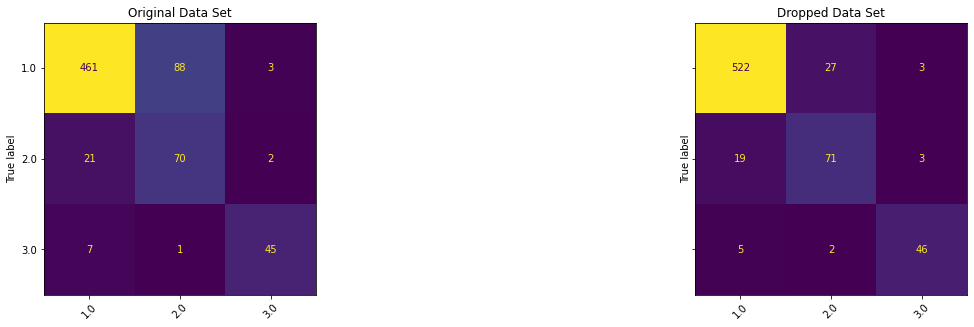

The model with the original ds achieved accuracy of 85.81661891117479%!
The model with the dropped ds achieved accuracy of 90.83094555873924%!


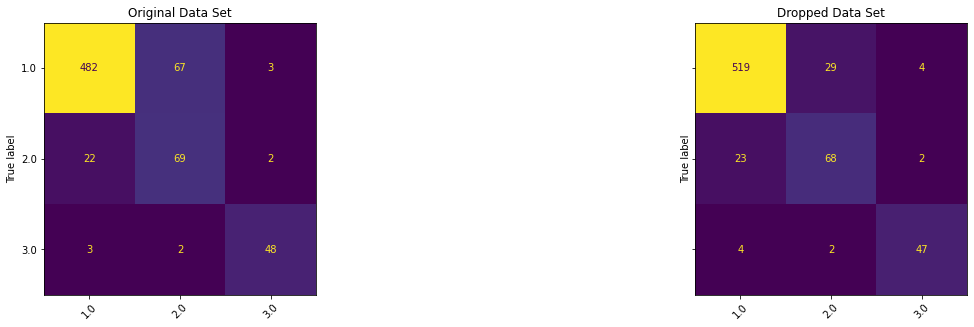

The model with the original ds achieved accuracy of 82.6647564469914%!
The model with the dropped ds achieved accuracy of 89.54154727793696%!


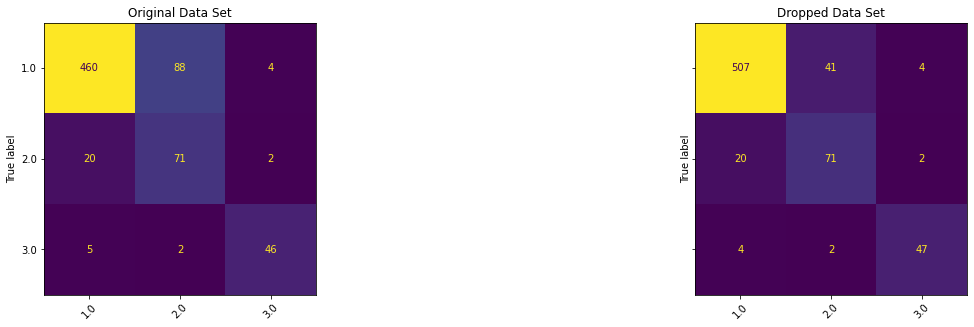

In [143]:
est = [10,20,50,75,100,200,500,1000]
for e in est:
  ad_Classifier_1 = AdaBoostClassifier(n_estimators=e)
  ad_Classifier_2 = AdaBoostClassifier(n_estimators=e)
  train_test_models(ad_Classifier_1, ad_Classifier_2 )

#### Adaboost Analysis


### SVM

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

linear
The model with the original ds achieved accuracy of 88.39541547277938%!
The model with the dropped ds achieved accuracy of 88.82521489971347%!


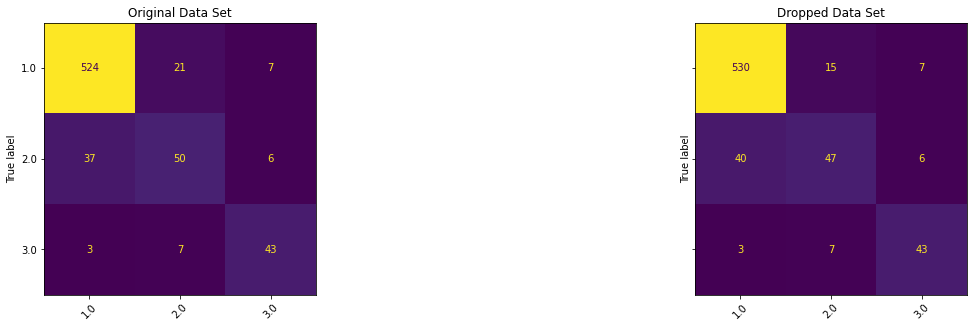

poly
The model with the original ds achieved accuracy of 89.97134670487105%!
The model with the dropped ds achieved accuracy of 88.96848137535817%!


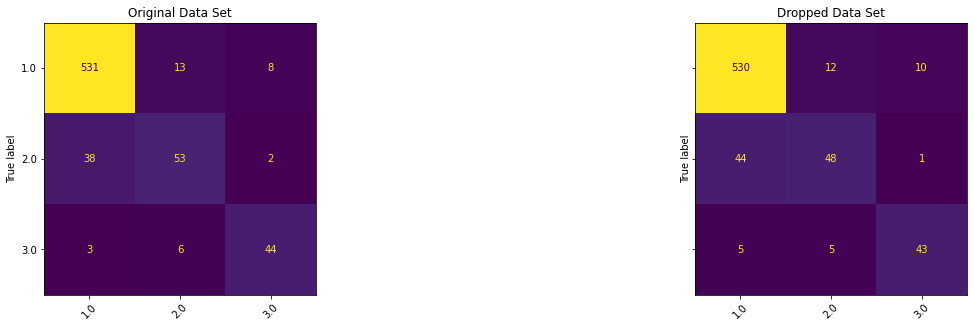

rbf
The model with the original ds achieved accuracy of 87.10601719197709%!
The model with the dropped ds achieved accuracy of 88.25214899713467%!


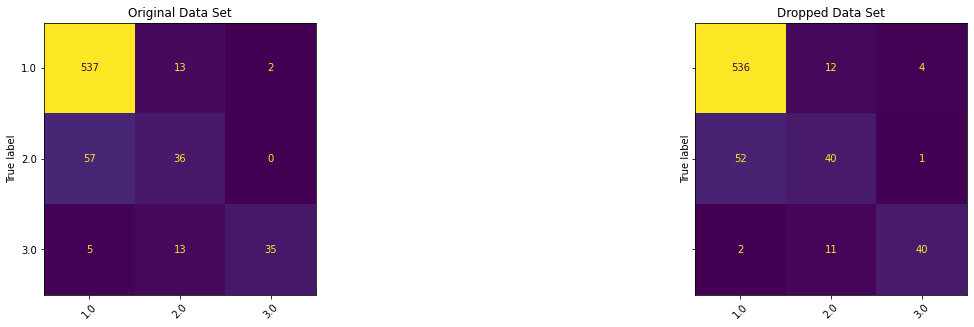

sigmoid
The model with the original ds achieved accuracy of 76.36103151862464%!
The model with the dropped ds achieved accuracy of 74.78510028653295%!


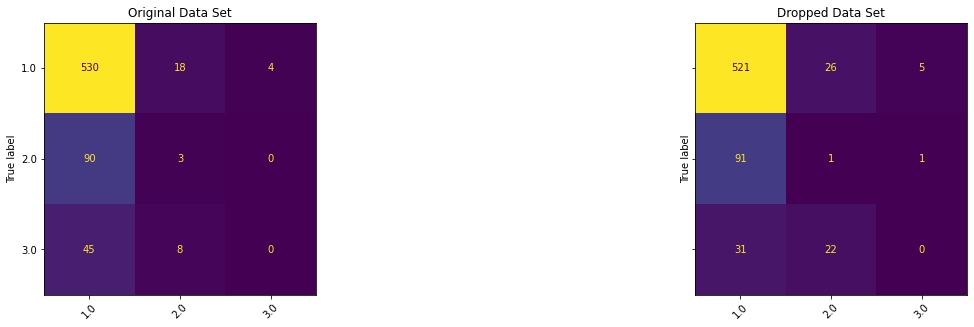

In [144]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  print(kernel)
  svm_model_1 = SVC(kernel = kernel ,degree = 6) #degree only used when kernel ='poly'
  svm_model_2 = SVC(kernel = kernel ,degree = 6) #degree only used when kernel ='poly'
  train_test_models(svm_model_1, svm_model_2)

#### SVM Analysis

### DT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

gini:
The model with the original ds achieved accuracy of 92.97994269340974%!
The model with the dropped ds achieved accuracy of 93.55300859598854%!


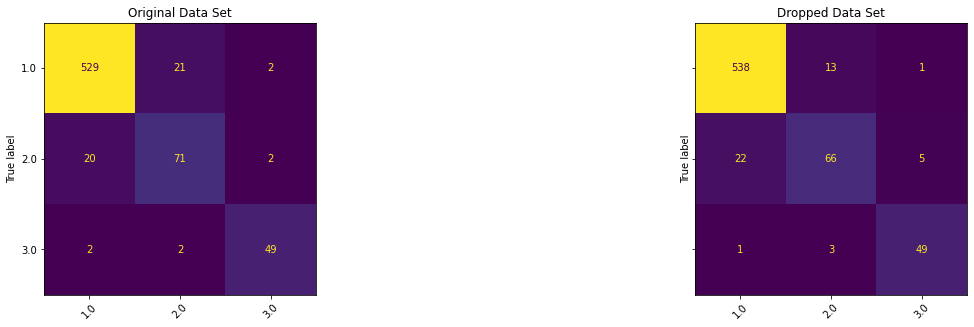

entropy:
The model with the original ds achieved accuracy of 93.69627507163324%!
The model with the dropped ds achieved accuracy of 94.12607449856733%!


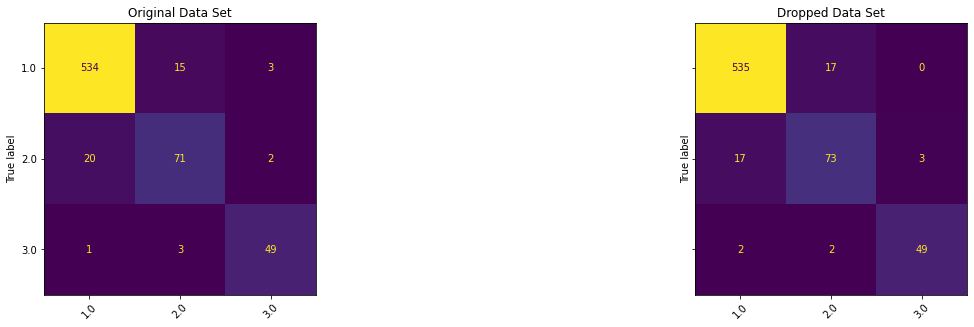

In [145]:
criterions = ['gini', 'entropy']
for c in criterions:
  print(f'{c}:')
  DT_1 = DecisionTreeClassifier(criterion=c)
  DT_2 = DecisionTreeClassifier(criterion=c)
  train_test_models(DT_1, DT_2)

#### dt Analysis


### Random Forest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

gini:
The model with the original ds achieved accuracy of 94.98567335243553%!
The model with the dropped ds achieved accuracy of 95.55873925501433%!


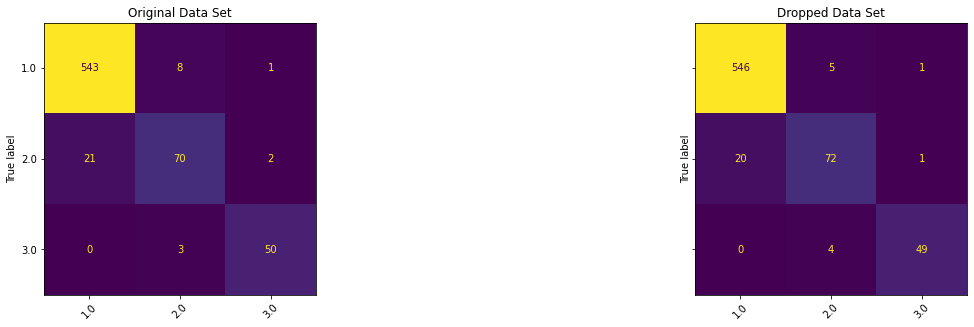

entropy:
The model with the original ds achieved accuracy of 95.55873925501433%!
The model with the dropped ds achieved accuracy of 95.84527220630372%!


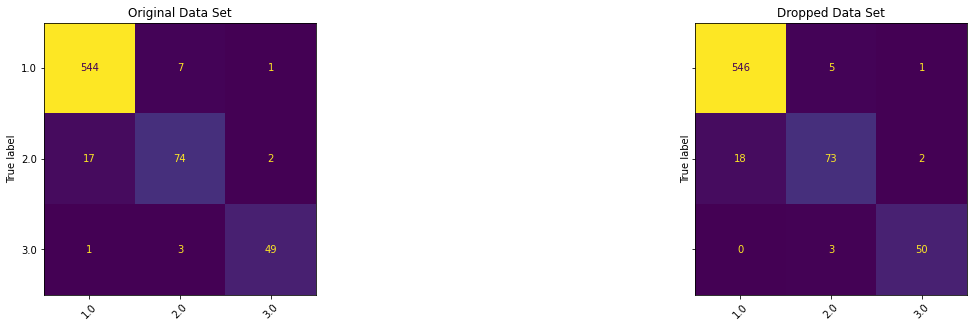

In [146]:
criterions = ['gini', 'entropy']
for c in criterions:
  print(f'{c}:')
  DT_1 = RandomForestClassifier(criterion=c)
  DT_2 = RandomForestClassifier(criterion=c)
  train_test_models(DT_1, DT_2)

#### Random Forest Analisys

### XGboost

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model with the original ds achieved accuracy of 95.27220630372493%!
The model with the dropped ds achieved accuracy of 96.13180515759312%!


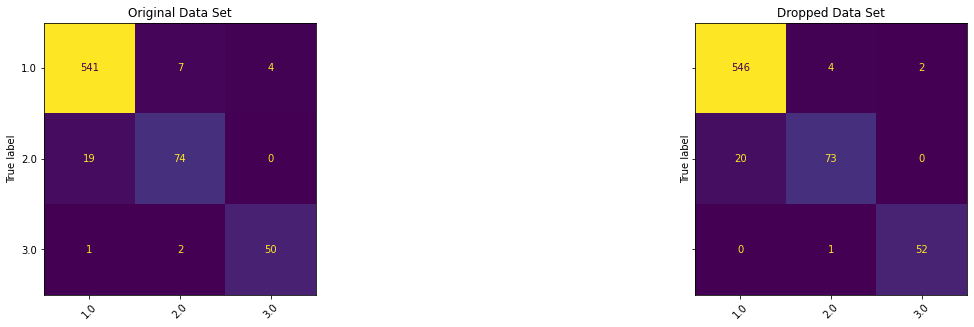

In [147]:
xgb_1 = xgb.XGBClassifier()
xgb_2 = xgb.XGBClassifier()
train_test_models(xgb_1, xgb_2)

#### xgboost analisys